
<font size="+3"><strong>Facebook Prophet Time Series Forecasting</strong></font>

In [3]:
__author__ = "Donald Ghazi"
__email__ = "donald@donaldghazi.com"
__website__ = "donaldghazi.com"

# TASK #1: PROJECT OVERVIEW 


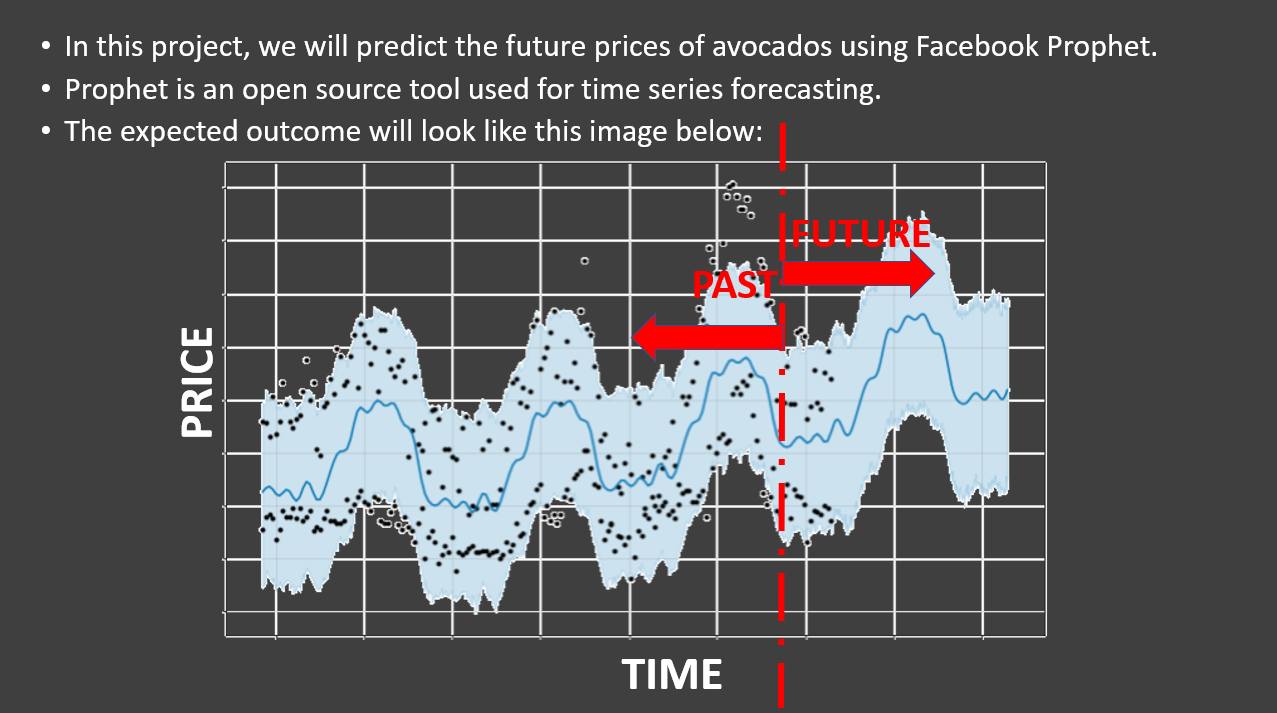


# TASK #2: IMPORT LIBRARIES AND DATASET

- Install fbprophet package as follows: 
     pip install fbprophet
     
- If you encounter an error, try: 
    conda install -c conda-forge fbprophet



In [14]:
# Import libraries 

import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import random
import seaborn as sns
import warnings

from fbprophet import Prophet

warnings.simplefilter(action='ignore', category=FutureWarning)

In [15]:
# Dataframes creation for both training and testing datasets 
avocado_df = pd.read_csv('avocado.csv')


- Date: The date of the observation
- AveragePrice: the average price of a single avocado
- type: conventional or organic
- year: the year
- Region: the city or region of the observation
- Total Volume: Total number of avocados sold
- 4046: Total number of avocados with PLU 4046 sold
- 4225: Total number of avocados with PLU 4225 sold
- 4770: Total number of avocados with PLU 4770 sold

In [16]:
# View the head of the training dataset
avocado_df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [17]:
# View the last elements in the training dataset
avocado_df.tail(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18239,2,2018-03-11,1.56,22128.42,2162.67,3194.25,8.93,16762.57,16510.32,252.25,0.0,organic,2018,WestTexNewMexico
18240,3,2018-03-04,1.54,17393.30,1832.24,1905.57,0.00,13655.49,13401.93,253.56,0.0,organic,2018,WestTexNewMexico
18241,4,2018-02-25,1.57,18421.24,1974.26,2482.65,0.00,13964.33,13698.27,266.06,0.0,organic,2018,WestTexNewMexico
18242,5,2018-02-18,1.56,17597.12,1892.05,1928.36,0.00,13776.71,13553.53,223.18,0.0,organic,2018,WestTexNewMexico
18243,6,2018-02-11,1.57,15986.17,1924.28,1368.32,0.00,12693.57,12437.35,256.22,0.0,organic,2018,WestTexNewMexico
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [18]:
avocado_df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [19]:
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [20]:
avocado_df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# TASK #3: EXPLORE DATASET  

In [21]:
avocado_df = avocado_df.sort_values('Date')

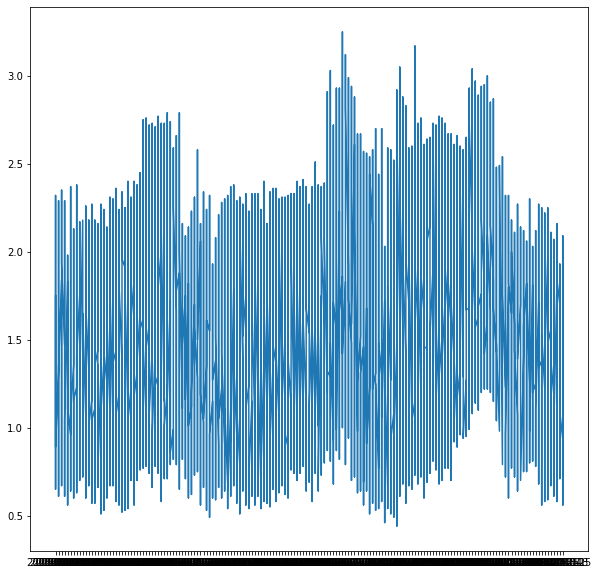

In [22]:
# Plot date and average price
plt.figure(figsize = (10,10))
plt.plot(avocado_df['Date'], avocado_df['AveragePrice']);

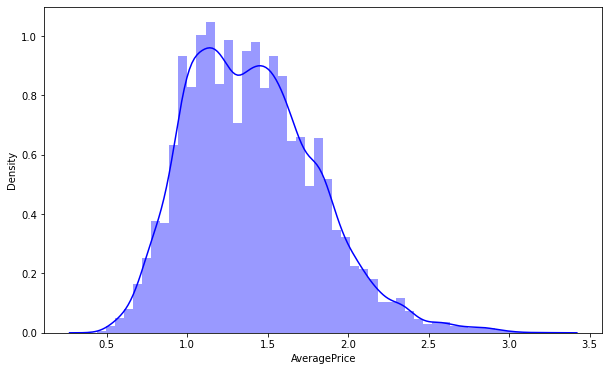

In [23]:
# Plot distribution of the average price
plt.figure(figsize = (10, 6))
sns.distplot(avocado_df['AveragePrice'], color = 'b');

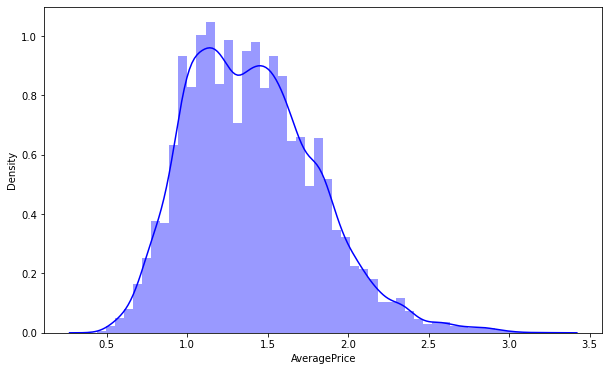

In [24]:
# Plot distribution of the average price
plt.figure(figsize = (10, 6))
sns.distplot(avocado_df['AveragePrice'], color = 'b');

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

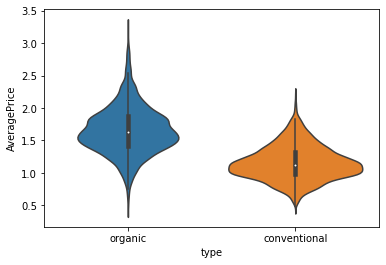

In [25]:
# Plot a violin plot of the average price vs. avocado type
sns.violinplot(y = 'AveragePrice', x ='type', data =avocado_df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53]),
 [Text(0, 0, 'Southeast'),
  Text(1, 0, 'Chicago'),
  Text(2, 0, 'HarrisburgScranton'),
  Text(3, 0, 'Pittsburgh'),
  Text(4, 0, 'Boise'),
  Text(5, 0, 'WestTexNewMexico'),
  Text(6, 0, 'LosAngeles'),
  Text(7, 0, 'LasVegas'),
  Text(8, 0, 'Atlanta'),
  Text(9, 0, 'DallasFtWorth'),
  Text(10, 0, 'MiamiFtLauderdale'),
  Text(11, 0, 'Plains'),
  Text(12, 0, 'StLouis'),
  Text(13, 0, 'Syracuse'),
  Text(14, 0, 'Midsouth'),
  Text(15, 0, 'Sacramento'),
  Text(16, 0, 'Boston'),
  Text(17, 0, 'Charlotte'),
  Text(18, 0, 'Spokane'),
  Text(19, 0, 'Albany'),
  Text(20, 0, 'Houston'),
  Text(21, 0, 'SouthCarolina'),
  Text(22, 0, 'SanFrancisco'),
  Text(23, 0, 'TotalUS'),
  Text(24, 0, 'RaleighGreensboro'),
  Text(25, 0, 'BuffaloRochester'),
  Text(

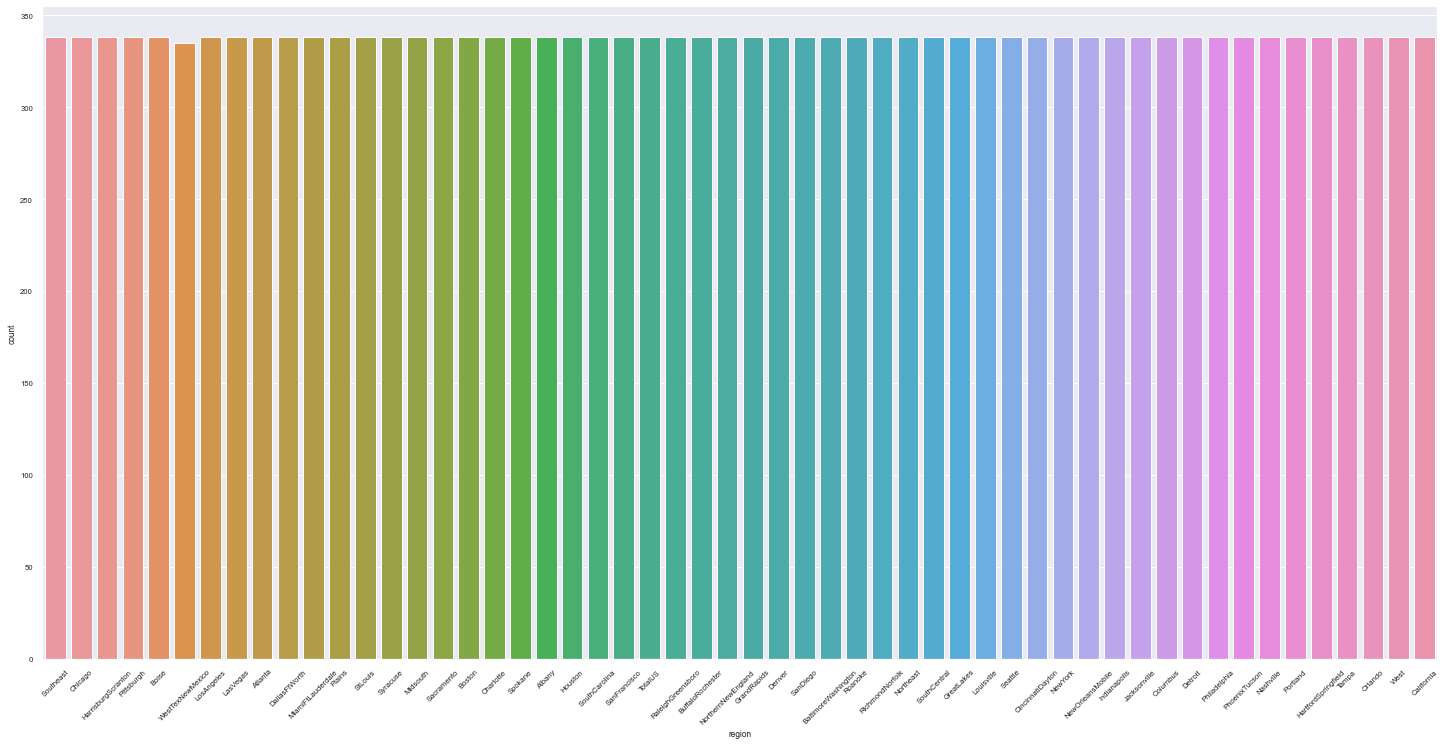

In [26]:
# Bar Chart to indicate the number of regions 

sns.set(font_scale=0.7) 
plt.figure(figsize=[25,12])
sns.countplot(x = 'region', data = avocado_df)
plt.xticks(rotation = 45)


(array([0, 1, 2, 3]),
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018')])

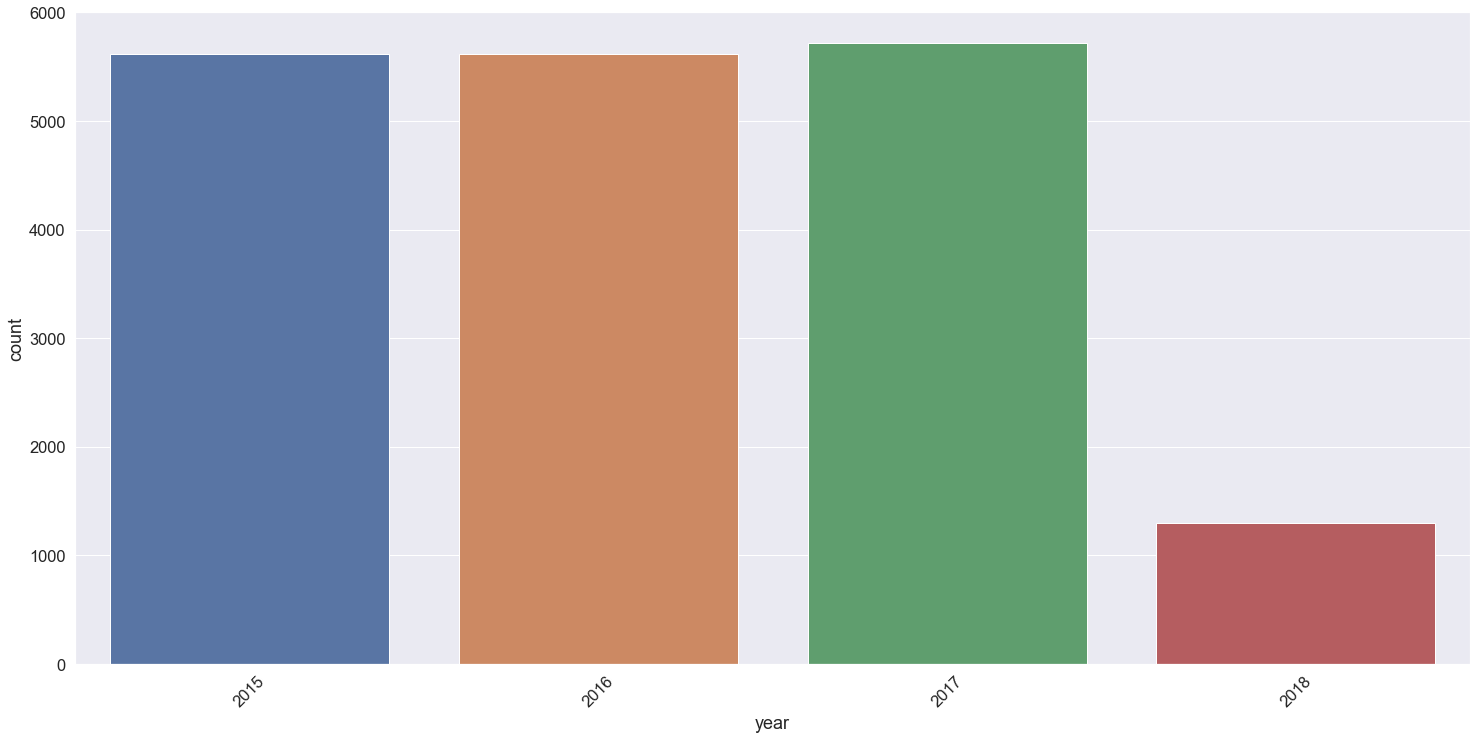

In [27]:
# Bar Chart to indicate the count in every year
sns.set(font_scale=1.5) 
plt.figure(figsize=[25,12])
sns.countplot(x = 'year', data = avocado_df)
plt.xticks(rotation = 45)

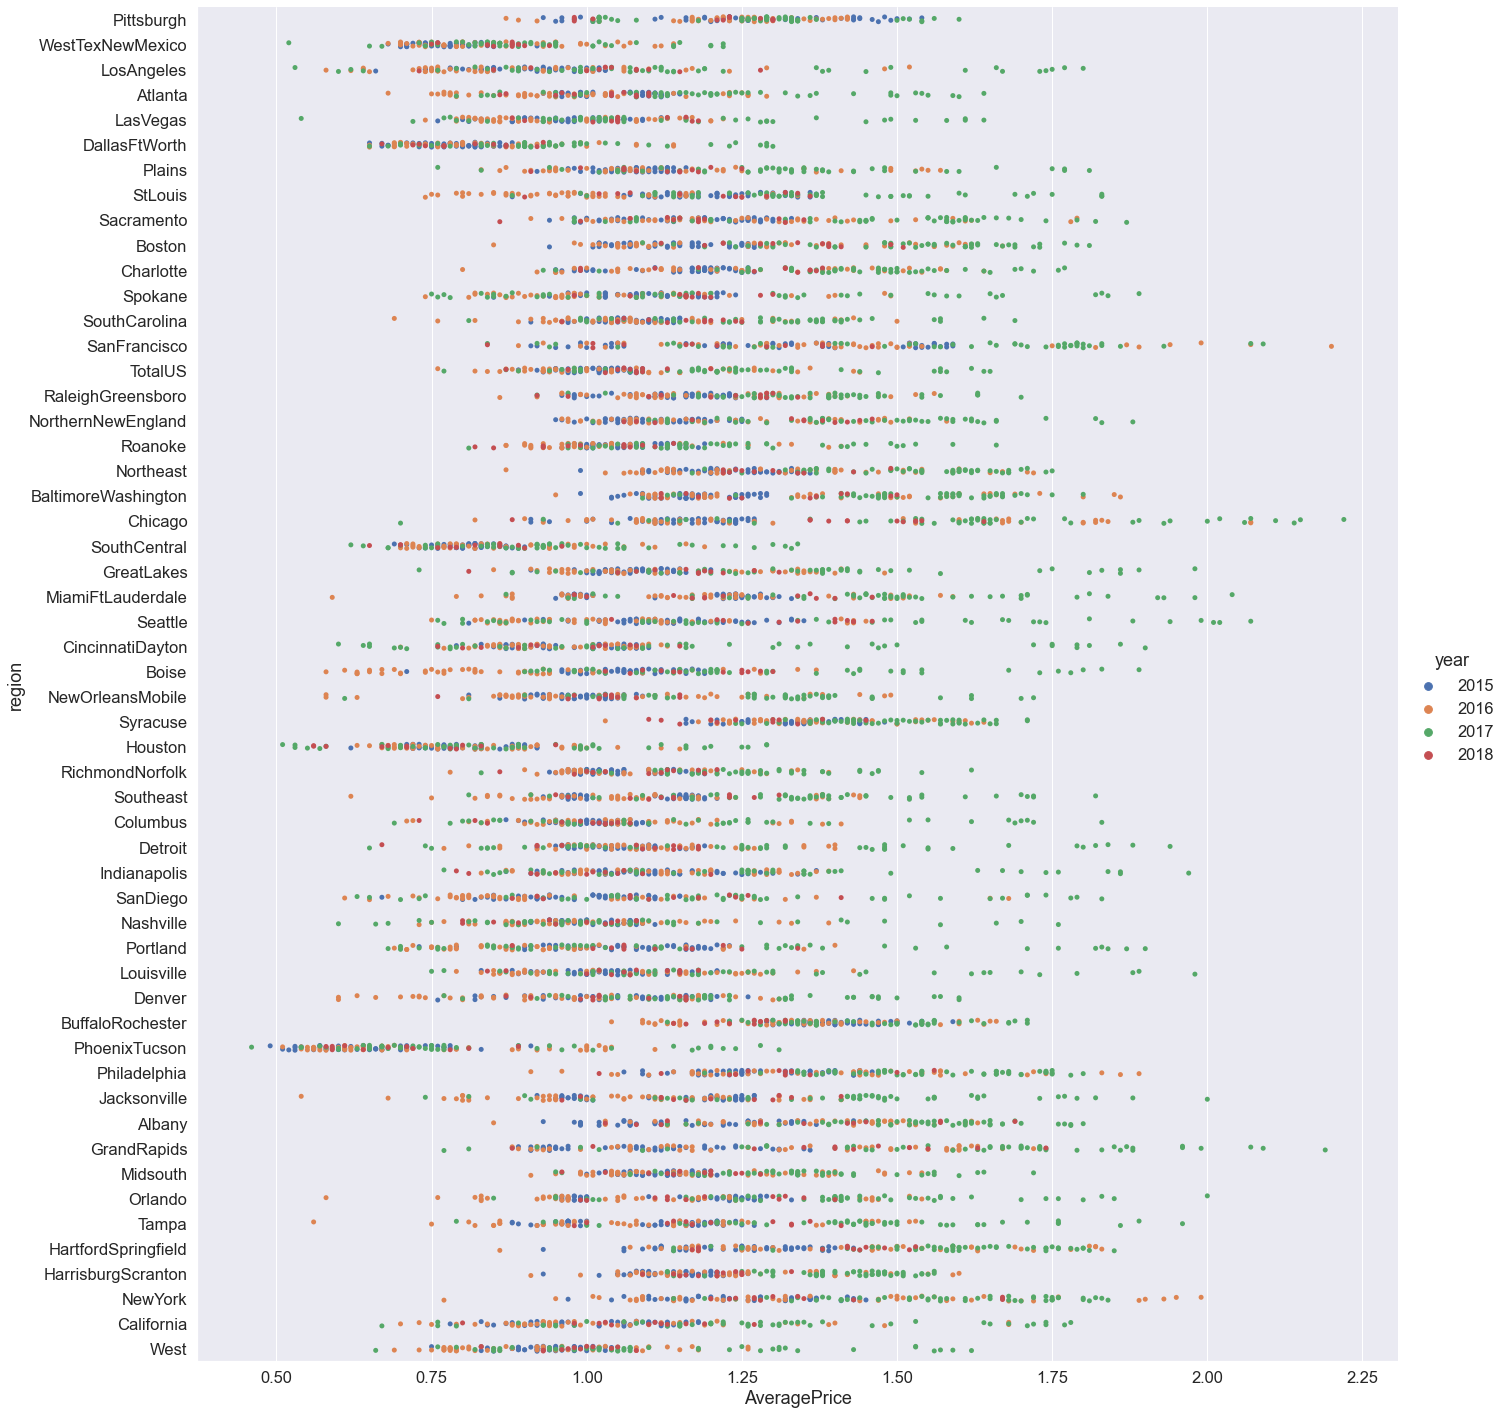

In [28]:
 # plot the avocado prices vs. regions for conventional avocados
conventional = sns.catplot('AveragePrice', 'region', data = avocado_df[avocado_df['type']=='conventional'],hue = 'year', height = 20)

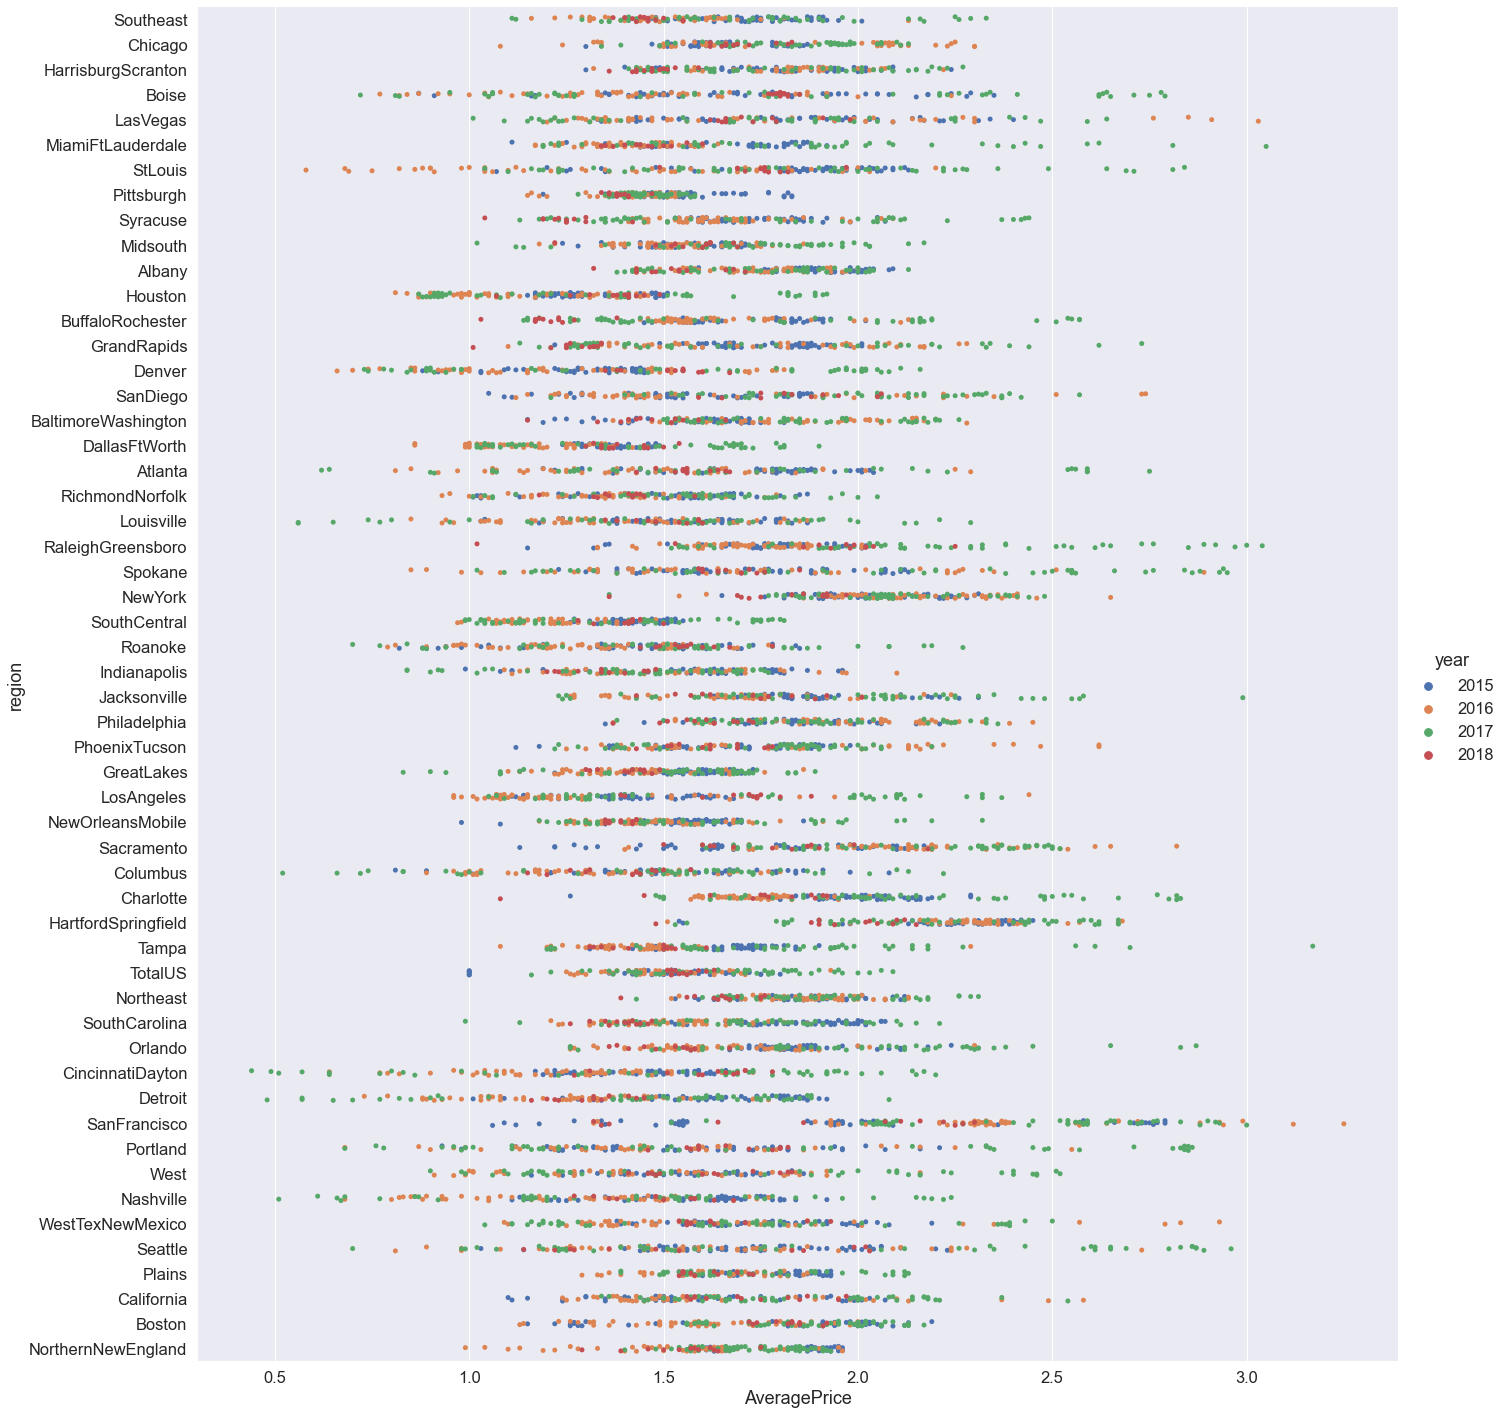

In [29]:
  # plot the avocado prices vs. regions for organic avocados
conventional = sns.catplot('AveragePrice', 'region', data = avocado_df[avocado_df['type']=='organic'],hue = 'year', height = 20)

# TASK 4: PREPARE THE DATA BEFORE APPLYING FACEBOOK PROPHET TOOL 

In [30]:
avocado_df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,51,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.00,organic,2015,Southeast
9593,51,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.00,organic,2015,Chicago
10009,51,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.00,organic,2015,HarrisburgScranton
1819,51,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.00,conventional,2015,Pittsburgh
9333,51,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,organic,2015,Boise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8574,0,2018-03-25,1.36,908202.13,142681.06,463136.28,174975.75,127409.04,103579.41,22467.04,1362.59,conventional,2018,Chicago
9018,0,2018-03-25,0.70,9010588.32,3999735.71,966589.50,30130.82,4014132.29,3398569.92,546409.74,69152.63,conventional,2018,SouthCentral
18141,0,2018-03-25,1.42,163496.70,29253.30,5080.04,0.00,129163.36,109052.26,20111.10,0.00,organic,2018,SouthCentral
17673,0,2018-03-25,1.70,190257.38,29644.09,70982.10,0.00,89631.19,89424.11,207.08,0.00,organic,2018,California


In [31]:
avocado_prophet_df = avocado_df[['Date','AveragePrice']] 

In [32]:
avocado_prophet_df

,Date,AveragePrice
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


In [33]:
avocado_prophet_df = avocado_prophet_df.rename(columns = {'Date': 'ds', 'AveragePrice': 'y'})

In [34]:
avocado_prophet_df 

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49
10009,2015-01-04,1.68
1819,2015-01-04,1.52
9333,2015-01-04,1.64
...,...,...
8574,2018-03-25,1.36
9018,2018-03-25,0.70
18141,2018-03-25,1.42
17673,2018-03-25,1.70


# TASK 5: UNDERSTAND INTUITION BEHIND FACEBOOK PROPHET

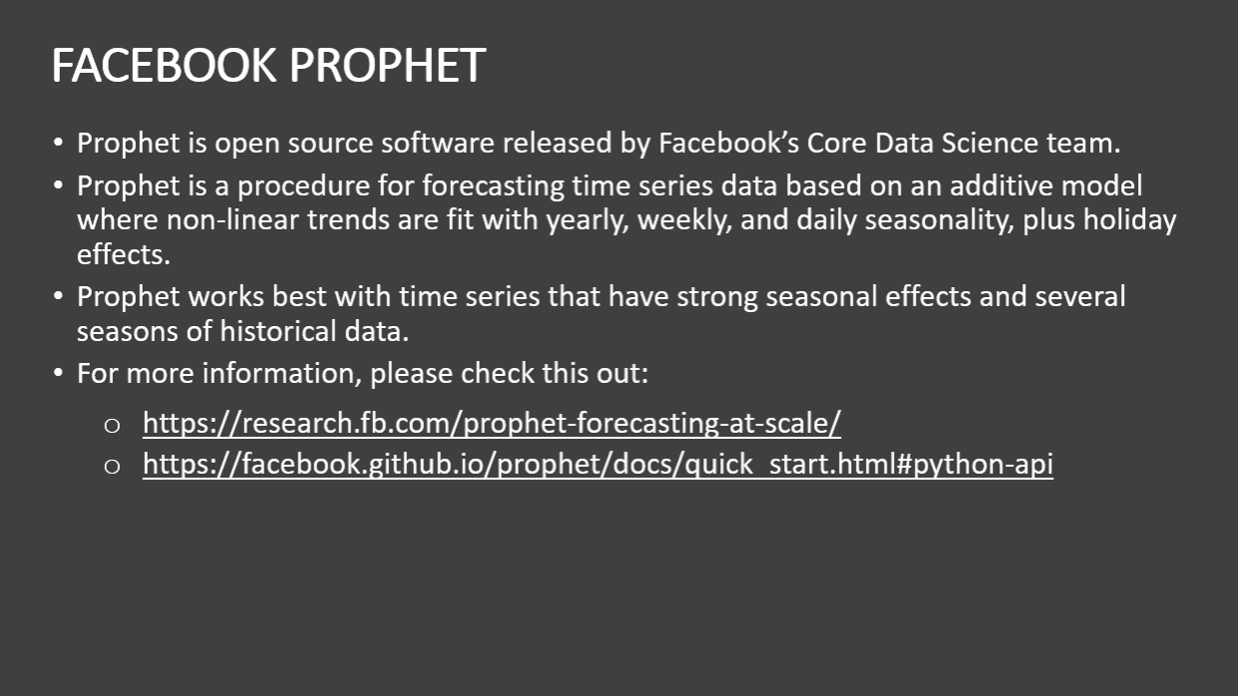

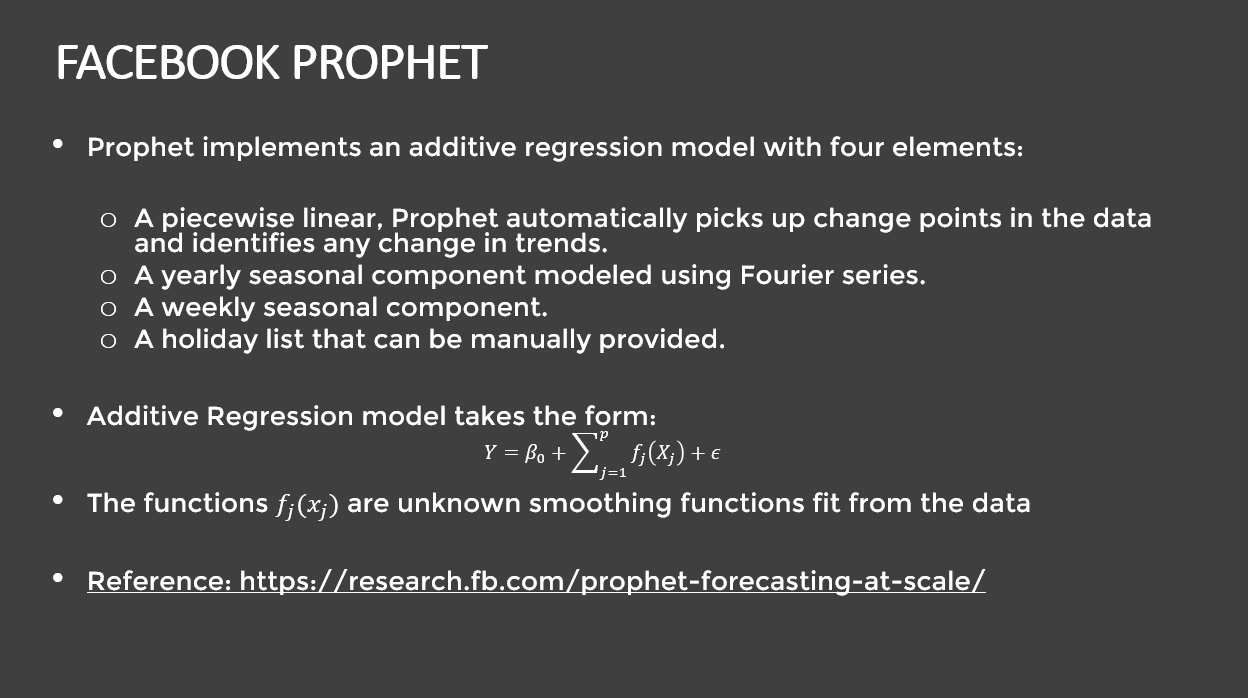

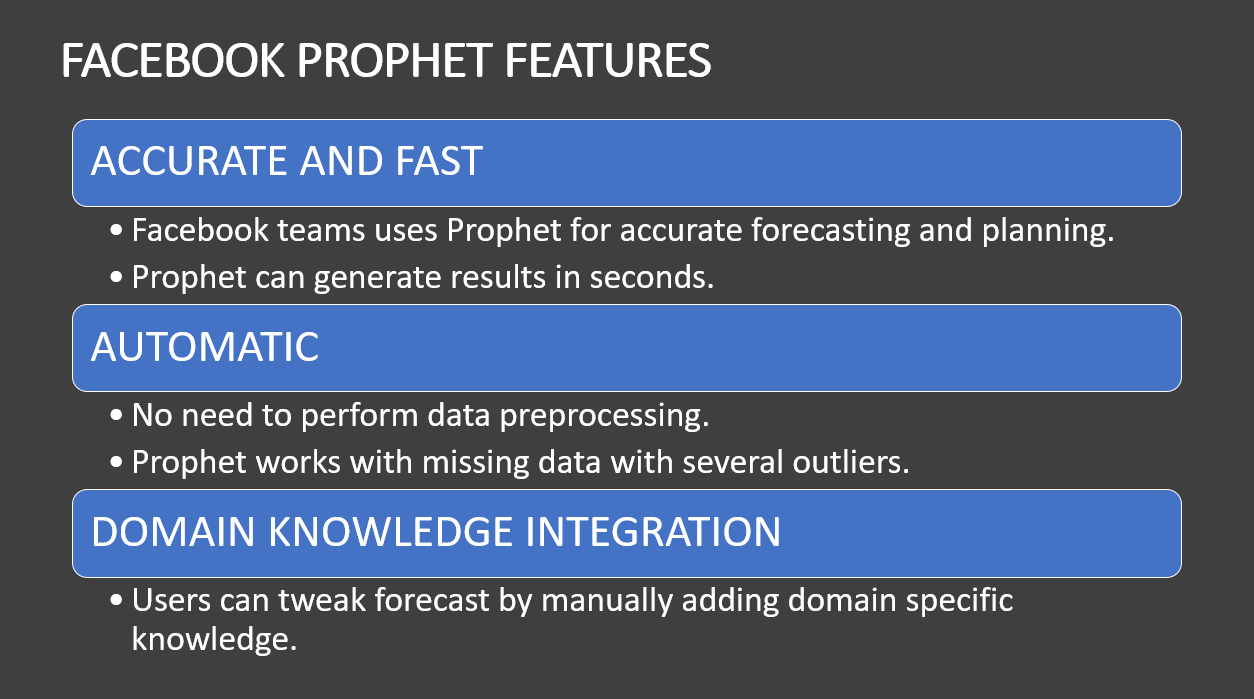

# TASK 6: DEVELOP MODEL AND MAKE PREDICTIONS - PART A

In [36]:
m = Prophet()
m.fit(avocado_prophet_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -234.061


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       30091.5    0.00133528       366.038      0.4185           1      136   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     186       30095.9   0.000106749       198.267   2.807e-07       0.001      299  LS failed, Hessian reset 
     199       30096.5    0.00540266       301.218           1           1      314   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       30097.5   0.000123837        63.326      0.3897      0.9597      447   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       30098.6   0.000120492       121.976           1           1      577   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     436       30098.7   8.58201e-05       167.199   3.452e-07       0.001      6

In [37]:
# Forcasting into the future
future = m.make_future_dataframe(periods = 365)
forecast = m.predict(future)

In [38]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.498881,0.919881,1.875437,1.498881,1.498881,-0.113999,-0.113999,-0.113999,-0.113999,-0.113999,-0.113999,0.0,0.0,0.0,1.384882
1,2015-01-11,1.493692,0.904837,1.853533,1.493692,1.493692,-0.105574,-0.105574,-0.105574,-0.105574,-0.105574,-0.105574,0.0,0.0,0.0,1.388118
2,2015-01-18,1.488502,0.917518,1.841301,1.488502,1.488502,-0.105237,-0.105237,-0.105237,-0.105237,-0.105237,-0.105237,0.0,0.0,0.0,1.383266
3,2015-01-25,1.483313,0.881213,1.829456,1.483313,1.483313,-0.124171,-0.124171,-0.124171,-0.124171,-0.124171,-0.124171,0.0,0.0,0.0,1.359143
4,2015-02-01,1.478124,0.814036,1.825842,1.478124,1.478124,-0.152507,-0.152507,-0.152507,-0.152507,-0.152507,-0.152507,0.0,0.0,0.0,1.325617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529,2019-03-21,1.167445,0.571992,1.599009,0.995315,1.343636,-0.086434,-0.086434,-0.086434,-0.086434,-0.086434,-0.086434,0.0,0.0,0.0,1.081011
530,2019-03-22,1.166725,0.590117,1.598479,0.993489,1.343591,-0.084732,-0.084732,-0.084732,-0.084732,-0.084732,-0.084732,0.0,0.0,0.0,1.081992
531,2019-03-23,1.166005,0.549841,1.589847,0.992315,1.343969,-0.082755,-0.082755,-0.082755,-0.082755,-0.082755,-0.082755,0.0,0.0,0.0,1.083249
532,2019-03-24,1.165285,0.538360,1.596716,0.990124,1.344894,-0.080522,-0.080522,-0.080522,-0.080522,-0.080522,-0.080522,0.0,0.0,0.0,1.084762


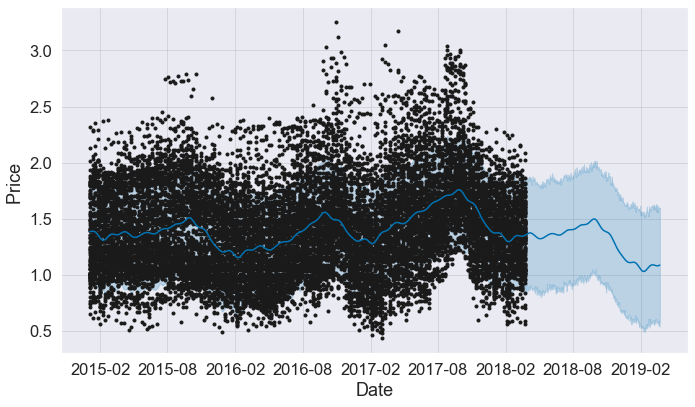

In [39]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Price ')

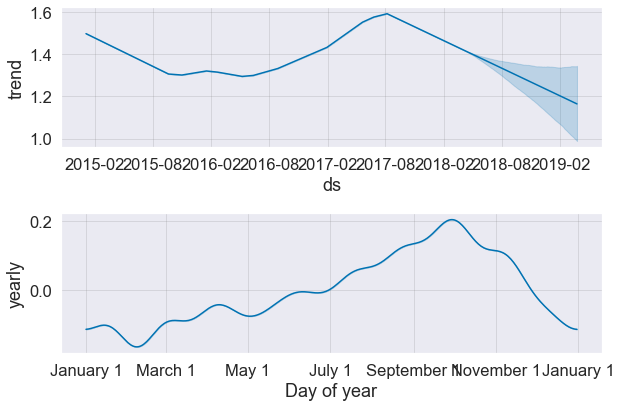

In [40]:
figure2 = m.plot_components(forecast)

# TASK 7: DEVELOP MODEL AND MAKE PREDICTIONS (REGION SPECIFIC) - PART B

In [41]:
# dataframes creation for both training and testing datasets 
avocado_df = pd.read_csv('avocado.csv')


In [42]:
# Select specific region
avocado_df_sample = avocado_df[avocado_df['region']=='West']

In [43]:
avocado_df_sample = avocado_df_sample.sort_values('Date')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


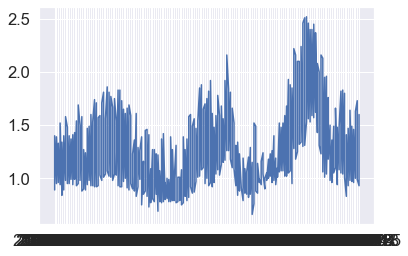

In [44]:
plt.plot(avocado_df_sample['Date'],avocado_df_sample['AveragePrice'])

In [45]:
avocado_df_sample = avocado_df_sample.rename(columns = {'Date':'ds','AveragePrice':'y'})

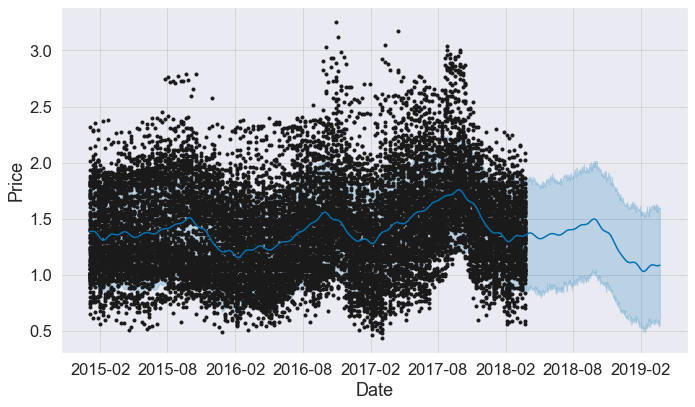

In [46]:
figure = m.plot(forecast, xlabel='Date', ylabel='Price')

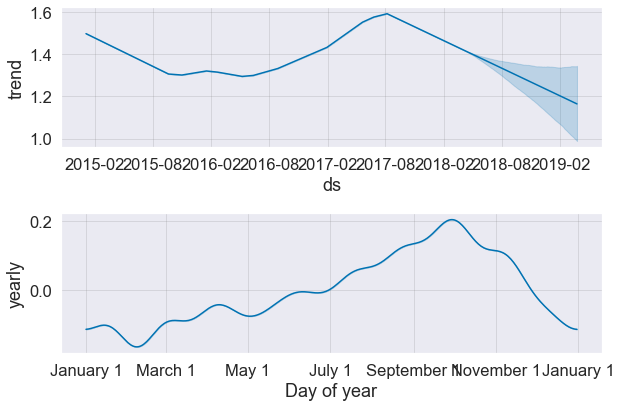

In [47]:
figure3 = m.plot_components(forecast)